In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv(r"C:\Users\user\Desktop\kaggle data new\train.csv")
test = pd.read_csv(r"C:\Users\user\Desktop\kaggle data new\test.csv")

In [6]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23562 entries, 0 to 23561
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              23562 non-null  int64  
 1   Province_State  10010 non-null  object 
 2   Country_Region  23562 non-null  object 
 3   Date            23562 non-null  object 
 4   ConfirmedCases  23562 non-null  float64
 5   Fatalities      23562 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [9]:
train.corr()

,Id,ConfirmedCases,Fatalities
Id,1.000000,-0.001033,0.002376
ConfirmedCases,-0.001033,1.000000,0.868220
Fatalities,0.002376,0.868220,1.000000


In [21]:
df=pd.concat([train,test])

In [23]:
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId
0,1.0,NaN,Afghanistan,2020-01-22,0.0,0.0,NaN
1,2.0,NaN,Afghanistan,2020-01-23,0.0,0.0,NaN
2,3.0,NaN,Afghanistan,2020-01-24,0.0,0.0,NaN
3,4.0,NaN,Afghanistan,2020-01-25,0.0,0.0,NaN
4,5.0,NaN,Afghanistan,2020-01-26,0.0,0.0,NaN


In [24]:
df.iloc[22944]

Id                                 31855.0
Province_State    Turks and Caicos Islands
Country_Region              United Kingdom
Date                            2020-04-06
ConfirmedCases                         8.0
Fatalities                             1.0
ForecastId                             NaN
Name: 22944, dtype: object

In [25]:
df.Province_State.fillna('NaN',inplace=True)

In [26]:
df

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId
0,1.0,NaN,Afghanistan,2020-01-22,0.0,0.0,NaN
1,2.0,NaN,Afghanistan,2020-01-23,0.0,0.0,NaN
2,3.0,NaN,Afghanistan,2020-01-24,0.0,0.0,NaN
3,4.0,NaN,Afghanistan,2020-01-25,0.0,0.0,NaN
4,5.0,NaN,Afghanistan,2020-01-26,0.0,0.0,NaN
...,...,...,...,...,...,...,...
13153,NaN,NaN,Zimbabwe,2020-05-03,NaN,NaN,13154.0
13154,NaN,NaN,Zimbabwe,2020-05-04,NaN,NaN,13155.0
13155,NaN,NaN,Zimbabwe,2020-05-05,NaN,NaN,13156.0
13156,NaN,NaN,Zimbabwe,2020-05-06,NaN,NaN,13157.0


cheak the missing value

In [10]:
train.isnull().sum()

Id                    0
Province_State    13552
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [11]:
test.isnull().sum()

ForecastId           0
Province_State    7568
Country_Region       0
Date                 0
dtype: int64

<AxesSubplot:>

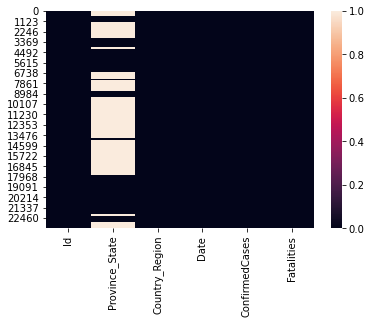

In [12]:
sns.heatmap(train.isnull())

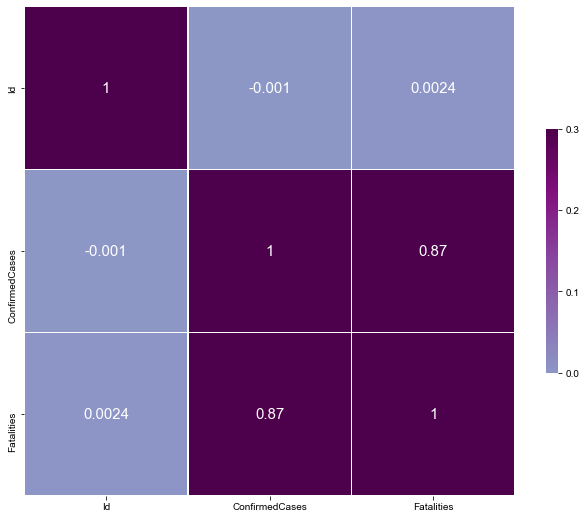

In [13]:
corr = train.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, cmap='BuPu', vmax=.3, center=0,
            square=False, linewidths=.5,annot=True, cbar_kws={"shrink": .5},annot_kws={"size": 15})
sns.set(font_scale=2.5)

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [16]:
enc=OneHotEncoder()
oe=OrdinalEncoder()

In [27]:
 df[['Province_State','Country_Region']] = oe.fit_transform(df.loc[:,['Province_State','Country_Region']])

In [29]:
df_ttrain=df.iloc[0:22950,:]

In [30]:
df_ttrain['Date']=pd.to_datetime(df_ttrain['Date'])

<ipython-input-30-6a1a8a8fadc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ttrain['Date']=pd.to_datetime(df_ttrain['Date'])


In [33]:
df_ttrain.shape

(22950, 7)

In [34]:
df_ttest=df.iloc[22950:,:]

In [35]:
df_ttest.shape

(13770, 7)

In [36]:
df_ttest['Date']=pd.to_datetime(df_ttest['Date'])

<ipython-input-36-0885fb0774e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ttest['Date']=pd.to_datetime(df_ttest['Date'])


In [37]:
df_ttrain['Date']=pd.to_datetime(df_ttrain['Date'])


<ipython-input-37-6a1a8a8fadc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ttrain['Date']=pd.to_datetime(df_ttrain['Date'])


In [38]:
import datetime as dt
def create_features(df):
    df['day'] = df['Date'].dt.day
    df['month'] = df['Date'].dt.month
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['quarter'] = df['Date'].dt.quarter
    df['weekofyear'] = df['Date'].dt.weekofyear
    return df

In [39]:
df_ttrain=df_ttrain.drop(['ForecastId'],axis=1)

In [40]:
df_ttest=df_ttest.drop(['Id','Fatalities','ConfirmedCases'],axis=1)


In [41]:
df_ttrain = create_features(df_ttrain)

<ipython-input-38-b4bfaa6a71d9>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


In [42]:
df_ttrain.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,day,month,dayofweek,dayofyear,quarter,weekofyear
0,1.0,70.0,0.0,2020-01-22,0.0,0.0,22,1,2,22,1,4
1,2.0,70.0,0.0,2020-01-23,0.0,0.0,23,1,3,23,1,4
2,3.0,70.0,0.0,2020-01-24,0.0,0.0,24,1,4,24,1,4
3,4.0,70.0,0.0,2020-01-25,0.0,0.0,25,1,5,25,1,4
4,5.0,70.0,0.0,2020-01-26,0.0,0.0,26,1,6,26,1,4


In [43]:
df_ttest = create_features(df_ttest)

<ipython-input-38-b4bfaa6a71d9>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Date'].dt.weekofyear


In [44]:
df_ttest.head()

,Province_State,Country_Region,Date,ForecastId,day,month,dayofweek,dayofyear,quarter,weekofyear
22950,70.0,172.0,2020-01-26,NaN,26,1,6,26,1,4
22951,70.0,172.0,2020-01-27,NaN,27,1,0,27,1,5
22952,70.0,172.0,2020-01-28,NaN,28,1,1,28,1,5
22953,70.0,172.0,2020-01-29,NaN,29,1,2,29,1,5
22954,70.0,172.0,2020-01-30,NaN,30,1,3,30,1,5


In [45]:
from xgboost.sklearn import XGBRegressor

In [46]:
 model1 = XGBRegressor(n_estimators=3000)

In [47]:
X_train=df_ttrain.loc[:,['Country_Region','Province_State','day','month','dayofweek','dayofyear','quarter','weekofyear']].values

In [48]:
y_train1=df_ttrain.loc[:,['ConfirmedCases']].values

In [49]:
y_train2=df_ttrain.loc[:,['Fatalities']].values

In [50]:
model1.fit(X_train,y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
model2 = XGBRegressor(n_estimators=3000)

In [52]:
model2.fit(X_train,y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
X_test=df_ttest.loc[:,['Country_Region','Province_State','day','month','dayofweek','dayofyear','quarter','weekofyear']].values

In [54]:
y_pred1=model1.predict(X_test)

In [55]:
y_pred2=model2.predict(X_test)

In [61]:
submission1['ConfirmedCases']=y_pred1
submission1['Fatalities']=y_pred2


ValueError: Length of values (13770) does not match length of index (13158)

In [60]:
submission1=pd.read_csv(r"C:\Users\user\Desktop\kaggle data new\submission.csv")

In [62]:
submission1.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1
